## Program to solve a Word Puzzle with 6 or more letters

In [38]:
import nltk
puzzle_letters = nltk.FreqDist('krdasied')   # The jumbled Word must comprise of 6 or more letters.
obligatory = 'r'   # Means that this specific letter should be present in each every unjumbled word.
wordlist = nltk.corpus.words.words()

[w for w in wordlist if len(w) >= 6   # This 6 can even be changed to 3, 4, 5 or any number depending upon the requirements.
                      and obligatory in w 
                      and nltk.FreqDist(w) <= puzzle_letters]  # FreqDist() counts the frequency of each word in the text.

['daiker', 'kaiser', 'kidder', 'raised', 'sidder', 'skidder']

## Program to remove the stop words

In [32]:
from nltk.tokenize import sent_tokenize, word_tokenize
from nltk.corpus import stopwords
 
data = "All work and no play makes jack a dull boy. So he should play as well"
stopWords = set(stopwords.words('english'))
words = word_tokenize(data)
wordsFiltered = []
 
for w in words:
    if w not in stopWords:
        wordsFiltered.append(w)
 
print(wordsFiltered)

['All', 'work', 'play', 'makes', 'jack', 'dull', 'boy', '.', 'So', 'play', 'well']


## Stemming

### A word stem is part of a word. It is sort of a normalization idea, but linguistic. For example, the stem of the word waiting, waited and waits is wait. There are many stemming algorithms but the most popular algorithm is Porter (PorterStemer).


In [35]:
from nltk.stem import PorterStemmer
from nltk.tokenize import sent_tokenize, word_tokenize
 
words = ["waiting","waited","waits"]
ps = PorterStemmer()
 
for word in words:
       ps.stem(word)
print(ps.stem(word))

wait


In [17]:
ps = PorterStemmer()
 
sentence = "gaming, the gamers play games"
words = word_tokenize(sentence)
 
for word in words:
    print(word + " : " + ps.stem(word))

gaming : game
, : ,
the : the
gamers : gamer
play : play
games : game


## Speech Tagging

### The module NLTK can automatically tag speech. Given a sentence or paragraph, it can label words such as verbs, nouns and so on.


In [18]:
from nltk.tokenize import PunktSentenceTokenizer
 
document = 'Whether you\'re new to programming or an experienced developer, it\'s easy to learn and use Python.'
sentences = nltk.sent_tokenize(document)   
for sent in sentences:
    print(nltk.pos_tag(nltk.word_tokenize(sent)))

[('Whether', 'IN'), ('you', 'PRP'), ("'re", 'VBP'), ('new', 'JJ'), ('to', 'TO'), ('programming', 'VBG'), ('or', 'CC'), ('an', 'DT'), ('experienced', 'JJ'), ('developer', 'NN'), (',', ','), ('it', 'PRP'), ("'s", 'VBZ'), ('easy', 'JJ'), ('to', 'TO'), ('learn', 'VB'), ('and', 'CC'), ('use', 'VB'), ('Python', 'NNP'), ('.', '.')]


### The meanings of these speech codes are shown in the table below:

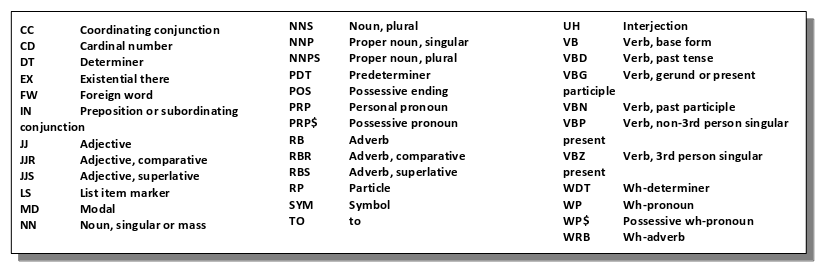

### We can also filter this data based on the type of word

In [37]:
from nltk.corpus import state_union
from nltk.tokenize import PunktSentenceTokenizer
 
document = 'Today the Netherlands celebrates King\'s Day. To honor this tradition, the Dutch embassy in Delhi invited me'
sentences = nltk.sent_tokenize(document)   
 
data = []
for sent in sentences:
    data = data + nltk.pos_tag(nltk.word_tokenize(sent))
 
for word in data: 
    if 'NNP' in word[1]:  # NNP means Proper Noun, Singular
        print(word)

('Netherlands', 'NNP')
('King', 'NNP')
('Day', 'NNP')
('Delhi', 'NNP')


## WordNet

### WordNet is a semantically-oriented dictionary of English, similar to a traditional thesaurus but with a richer structure. NLTK includes the English WordNet, with 155,287 words and 117,659 synonym sets.

In [79]:
from nltk.corpus import wordnet as wn
wn.synsets('motorcar')

[Synset('car.n.01')]

In [71]:
wn.synset("car.n.01").lemma_names()

['car', 'auto', 'automobile', 'machine', 'motorcar']

In [75]:
wn.synset('car.n.01').definition()

'a motor vehicle with four wheels; usually propelled by an internal combustion engine'

In [78]:
wn.synset('car.n.01').examples()

['he needs a car to get to work']

In [81]:
wn.synsets('car')

[Synset('car.n.01'),
 Synset('car.n.02'),
 Synset('car.n.03'),
 Synset('car.n.04'),
 Synset('cable_car.n.01')]

In [96]:
for synset in wn.synsets('car'):
     print (synset.lemma_names())

['car', 'auto', 'automobile', 'machine', 'motorcar']
['car', 'railcar', 'railway_car', 'railroad_car']
['car', 'gondola']
['car', 'elevator_car']
['cable_car', 'car']


# Processing Raw Text 

## Accessing Text from the Web and from Disk

In [98]:
from __future__ import division
import nltk, re, pprint

In [102]:
from urllib.request import urlopen
url = "http://www.ebooksread.com/dl2.php?action=output_file&id=345434&ext=txt&f=gut57580&a_id=128221"
raw = urlopen(url).read()
print(type(raw), len(raw))

<class 'bytes'> 615613


In [103]:
raw[:75]

b' ON SUNSET HIGHWAYS ***\r\n\r\n\r\n\r\n\r\nProduced by Melissa McDaniel and the Onlin'

### Dealing with HTML

In [108]:
url = "http://news.bbc.co.uk/2/hi/health/2284783.stm"
html = urlopen(url).read()
html[:60]

b'<!doctype html public "-//W3C//DTD HTML 4.0 Transitional//EN'

### Using BeautifulSoup package which takes an HTML string and returns raw text

In [33]:
from __future__ import division
import nltk, re, pprint
from urllib.request import urlopen
from bs4 import BeautifulSoup
url = "http://news.bbc.co.uk/2/hi/health/2284783.stm"
raw = BeautifulSoup(html).get_text()
tokens = nltk.word_tokenize(raw)
len(tokens)

981

In [35]:
tokens = tokens[96:399]
text = nltk.Text(tokens)
text.concordance('gene')

Displaying 5 of 5 matches:
hey say too few people now carry the gene for blondes to last beyond the next 
blonde hair is caused by a recessive gene . In order for a child to have blond
 have blonde hair , it must have the gene on both sides of the family in the g
ere is a disadvantage of having that gene or by chance . They do n't disappear
des would disappear is if having the gene was a disadvantage and I do not thin


### Reading Local Files

In [41]:
f = open('HI.txt')
raw = f.read()
raw

'Hello EveryOne'

### Capturing User Input

In [47]:
s = input("Enter some text: ")
print ("You typed", len(nltk.word_tokenize(s)), "words.")

Enter some text: Hi I am Arnav Anand from New Delhi, India
You typed 10 words.


## Regular Expressions for Detecting Word Patterns

In [53]:
import re
wordlist = [w for w in wordlist if re.search('ed$', w)]  # list of words ending with "ed".
len(wordlist)

9148

In [55]:
 [w for w in wordlist if re.search('^..j..t..$', w)] # '^' matches the start of a string and the '$' matches the end.

['dejected', 'unjilted', 'unjolted']

### Basic Regular Expression Meta-Characters, Including Wildcards, Ranges and Closures

      Operator           Behavior
         .    	 Wildcard, matches any character
        ^abc	 Matches some pattern abc at the start of a string
        abc$	 Matches some pattern abc at the end of a string
        [abc]	 Matches one of a set of characters
     [A-Z0-9]    Matches one of a range of characters
     ed|ing|s	 Matches one of the specified strings (disjunction)
        *	     Zero or more of previous item, e.g. a*, [a-z]* (also known as Kleene Closure)
        +	     One or more of previous item, e.g. a+, [a-z]+
        ?	     Zero or one of the previous item (i.e. optional), e.g. a?, [a-z]?
        {n}	     Exactly n repeats where n is a non-negative integer
        {n,}     At least n repeats
        {,n}     No more than n repeats
        {m,n}    At least m and no more than n repeats
        a(b|c)+  Parentheses that indicate the scope of the operators


### Strings and Formats

In [65]:
template = 'Lee wants a %s right now'
menu = ['sandwich', 'spam fritter', 'pancake']
for snack in menu:
           print (template % snack)

Lee wants a sandwich right now
Lee wants a spam fritter right now
Lee wants a pancake right now
